# TRANSFER WORD EMBEDDING MODEL

# AIDI 2000: ASSIGNMENT 2

Group Members:
- Zaina Firosh Kamal
- Preyaskumar Jayswal
- Kintu Declan Trevor

Import Libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt

Load Dataset.

In [2]:
# Load data
data = pd.read_csv("movie.csv")
data.dropna(inplace=True)
print(data.describe())
print(data.head())

              label
count  40000.000000
mean       0.499525
std        0.500006
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


Preprocess and Split Data.

In [3]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data["text"])

# Convert text data to sequences
sequences = tokenizer.texts_to_sequences(data["text"])

# Pad sequences to ensure uniform length
max_len = 100  # Adjust as needed
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Prepare labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data["label"])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

Define and Train Model.

In [4]:
# Define model
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the unknown token
embedding_dim = 100  # Adjust as needed
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
875/875 [==============================] - 248s 280ms/step - loss: 0.4040 - accuracy: 0.8072 - val_loss: 0.3270 - val_accuracy: 0.8560
Epoch 2/10
875/875 [==============================] - 226s 258ms/step - loss: 0.0527 - accuracy: 0.9829 - val_loss: 0.5363 - val_accuracy: 0.8198
Epoch 3/10
875/875 [==============================] - 184s 210ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.6185 - val_accuracy: 0.8416
Epoch 4/10
875/875 [==============================] - 157s 180ms/step - loss: 2.3365e-04 - accuracy: 1.0000 - val_loss: 0.6491 - val_accuracy: 0.8413
Epoch 5/10
875/875 [==============================] - 187s 214ms/step - loss: 6.0850e-05 - accuracy: 1.0000 - val_loss: 0.6713 - val_accuracy: 0.8430
Epoch 6/10
875/875 [==============================] - 163s 186ms/step - loss: 3.3895e-05 - accuracy: 1.0000 - val_loss: 0.6914 - val_accuracy: 0.8432
Epoch 7/10
875/875 [==============================] - 118s 135ms/step - loss: 2.0361e-05 - accuracy: 1.0000 - va

Make predictions and evaluate model performance.

In [5]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

375/375 [==============================] - 1s 4ms/step - loss: 0.7683 - accuracy: 0.8451
Test Loss: 0.7682709693908691
Test Accuracy: 0.8450833559036255


Plot graph of model performance.

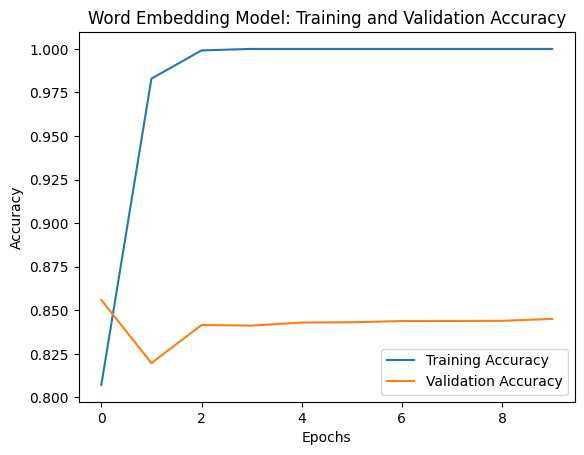

In [6]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Word Embedding Model: Training and Validation Accuracy')
plt.legend()
plt.show()